In [1]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

cwd = os.getcwd()

filenames = os.listdir()
print(filenames)
print(cwd)


['.ipynb_checkpoints', '4sig.jpeg', '4sig.png', 'BVP.png', 'BVP_emotions.png', 'cols.m', 'data.npy', 'dataplan.eps', 'dataplan.fig', 'dataplan.ps', 'day1.mat', 'day10.mat', 'day11.mat', 'day12.mat', 'day13.mat', 'day14.mat', 'day15.mat', 'day16.mat', 'day17.mat', 'day18.mat', 'day19.mat', 'day2.mat', 'day20.mat', 'day3.mat', 'day4.mat', 'day5.mat', 'day6.mat', 'day7.mat', 'day8.mat', 'day9.mat', 'display.m', 'EMG.png', 'labels.npy', 'loadall.m', 'makefig.m', 'match.m', 'match2.m', 'match4.m', 'match5.m', 'match6.m', 'pad.m', 'pmatch.m', 'pmatch2.m', 'RESP.png', 'RESP_full.npy', 'rows.m', 'SC.png', 'setA Arange data.ipynb', 'setA load_data.ipynb']
D:\AIproject\emotion recognition\MIT\SetA\MAS622data


### Load 1 file dữ liệu


{'day1': array([[ 1.6 ,  5.02,  1.55, ..., 42.94, 42.66, 41.87],
       [ 1.55,  4.5 ,  1.5 , ..., 42.91, 42.61, 41.88],
       [ 1.55,  5.95,  1.5 , ..., 42.91, 42.58, 41.91],
       ...,
       [ 1.66,  9.32,  1.97, ..., 41.25, 42.91, 42.43],
       [ 1.66,  9.68,  1.97, ..., 41.15, 42.92, 42.52],
       [ 1.66,  8.85,  1.92, ..., 41.16, 42.92, 42.6 ]])}
Kích thước dữ liệu của 1 file: (2001, 32)


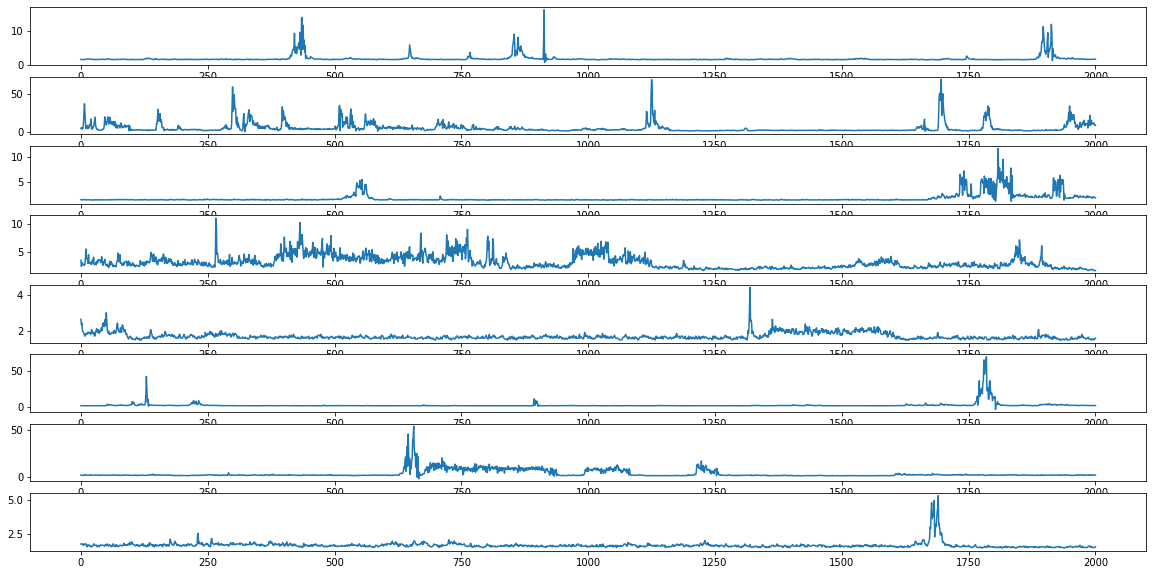

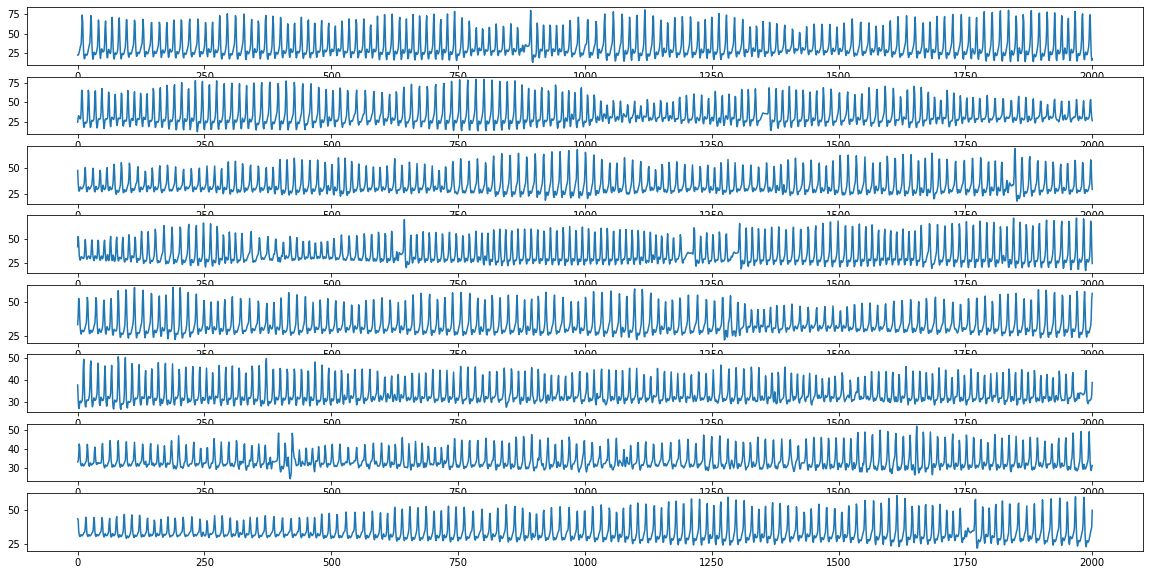

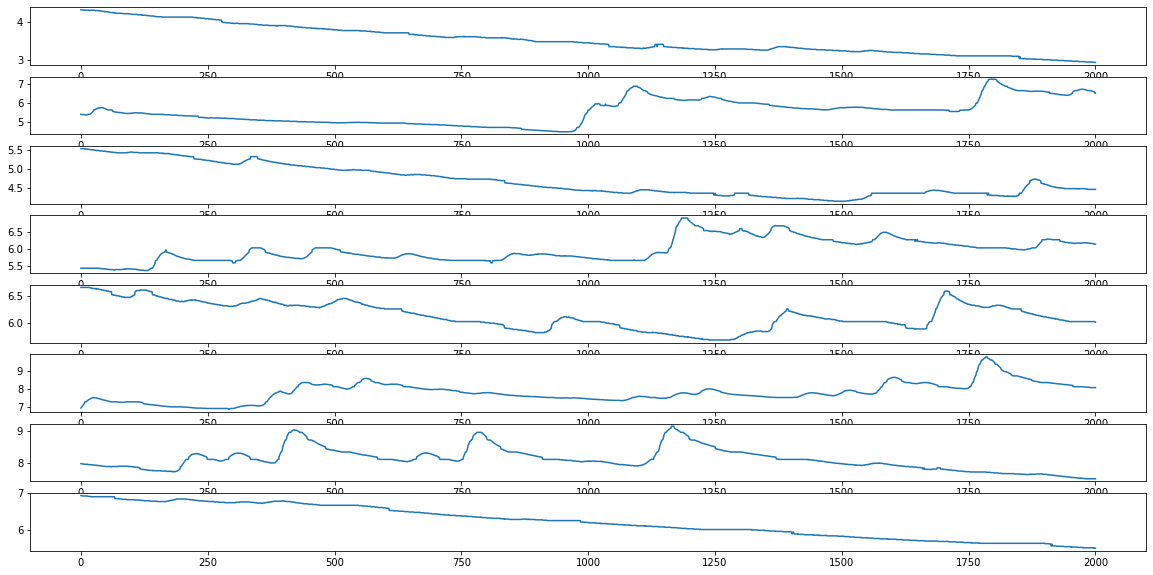

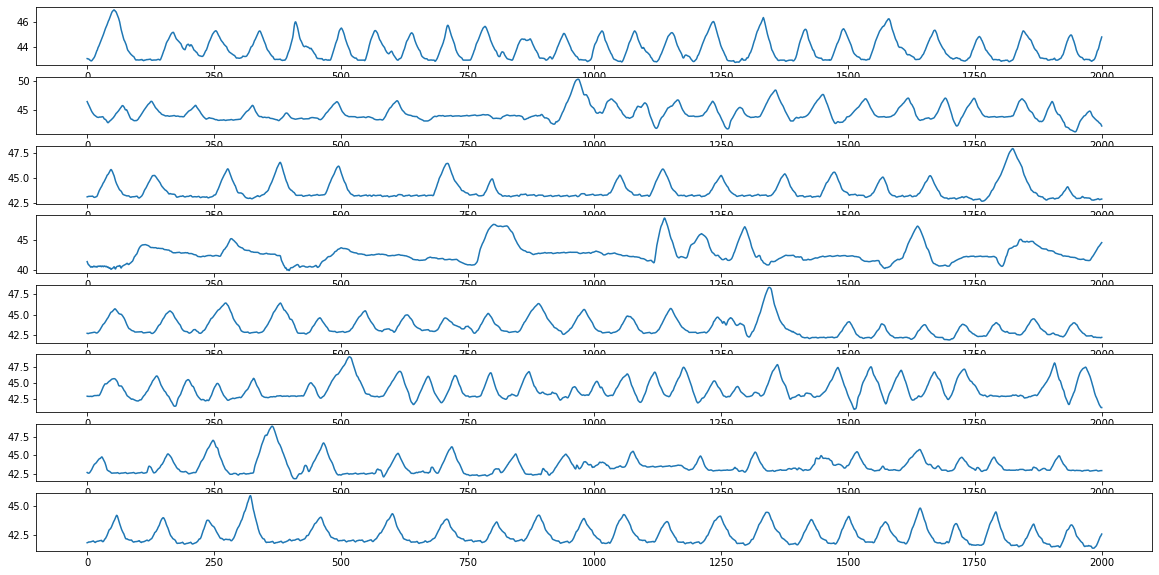

In [3]:
example = scipy.io.loadmat("day1.mat")
print(example)
data = example['day1']
print("Kích thước dữ liệu của 1 file:", data.shape)

fig, ax = plt.subplots(8, 1, figsize = (20, 10))
for i in range(8):
    ax[i].plot(data[:, i])
plt.show()

fig, ax = plt.subplots(8, 1, figsize = (20, 10))
for i, j in enumerate(range(8, 16)):
    ax[i].plot(data[:, j])
plt.show()
fig, ax = plt.subplots(8, 1, figsize = (20, 10))
for i, j in enumerate(range(16, 24)):
    ax[i].plot(data[:, j])
plt.show()
fig, ax = plt.subplots(8, 1, figsize = (20, 10))
for i, j in enumerate(range(24, 32)):
    ax[i].plot(data[:, j])
plt.show()

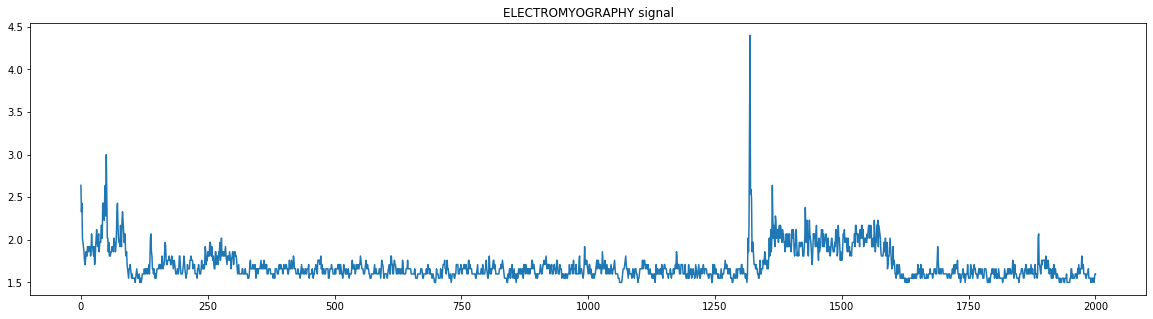

In [4]:
s = data[:, 4]
plt.figure(figsize= (20,5))
plt.plot(s)
plt.title("ELECTROMYOGRAPHY signal")
plt.savefig('EMG.png')
plt.show()

### Load toàn bộ 20 file dữ liệu


In [5]:

days = []
for i in range(1,21):
    days.append(scipy.io.loadmat("day" + str(i) + ".mat")['day'+str(i)])
days = np.array(days)
print(days.shape)

day1 = days[0]
day2 = days[1]
day3 = days[2]
day4 = days[3]
day5 = days[4]
day6 = days[5]
day7 = days[6]
day8 = days[7]
day9 = days[8]
day10 = days[9]
day11 = days[10]
day12 = days[11]
day13 = days[12]
day14 = days[13]
day15 = days[14]
day16 = days[15]
day17 = days[16]
day18 = days[17]
day19 = days[18]
day20 = days[19]

(20, 2001, 32)


### Sắp xếp lại dữ liệu theo thứ tự cảm xúc: 

In [6]:
def data_Create(day):
    dict = {}
    data = {}

    for i in range(0,32):
        if i%8 == 0:
            t1 = "No Emotion"
        elif i%8 == 1:
            t1 = "Anger"
        elif i%8 == 2:
            t1 = "Hate"
        elif i%8 == 3:
            t1 = "Grief"
        elif i%8 == 4:
            t1 = "P-Love"
        elif i%8 == 5:
            t1 = "R-Love"
        elif i%8 == 6:
            t1 = "Joy"
        else:
            t1 = "Reverence"
        if i/8 < 1:
            t2 = "EMG(jaw)"
            ymin = -10
            ymax = 200
        elif i/8 >=1 and i/8 <2:
            t2 = "BVP"
            ymin = 0
            ymax = 100
        elif i/8 >=2 and i/8 <3:
            t2 = "GSR(palm)"
            ymin = 0
            ymax = 5
        else:
            t2 = "Respiration"
            ymin = 35
            ymax = 70

#         t = [t1, t2]  
        dict[t1] = day[:, i]
        if i%8 == 7:
            data[t2] = dict
            dict = {}
    return data


In [7]:
i = 1
alldays_data = {}
for day in days:
    data = data_Create(day)
    alldays_data["day" +str(i)] = data
    i += 1
print(alldays_data.keys())

dict_keys(['day1', 'day2', 'day3', 'day4', 'day5', 'day6', 'day7', 'day8', 'day9', 'day10', 'day11', 'day12', 'day13', 'day14', 'day15', 'day16', 'day17', 'day18', 'day19', 'day20'])


## 

In [8]:
# dữ liệu của 1 ngày sau khi gán nhãn 
# print(alldays_data['day2'])
Keys = list(alldays_data['day2'].keys())
print(Keys)
Emotion_Keys = list(alldays_data['day2']['BVP'].keys())
print(Emotion_Keys)

['EMG(jaw)', 'BVP', 'GSR(palm)', 'Respiration']
['No Emotion', 'Anger', 'Hate', 'Grief', 'P-Love', 'R-Love', 'Joy', 'Reverence']


In [9]:
data_day1 = alldays_data['day1']
BVP = data_day1['BVP']
RES = data_day1['Respiration']
EMG = data_day1['EMG(jaw)']
GSR = data_day1['GSR(palm)']
print(BVP)

{'No Emotion': array([22.83, 22.77, 23.97, ..., 23.91, 15.94, 18.19]), 'Anger': array([24.83, 30.79, 33.08, ..., 39.27, 30.76, 26.77]), 'Hate': array([47.73, 35.06, 29.11, ..., 53.14, 37.63, 29.46]), 'Grief': array([41.49, 52.03, 45.87, ..., 65.41, 40.56, 24.26]), 'P-Love': array([33.47, 40.66, 53.  , ..., 37.99, 52.6 , 56.76]), 'R-Love': array([37.76, 30.9 , 27.58, ..., 31.73, 33.26, 38.85]), 'Joy': array([33.09, 33.47, 36.44, ..., 28.5 , 30.3 , 31.24]), 'Reverence': array([43.58, 42.8 , 34.75, ..., 35.4 , 37.61, 50.  ])}


In [10]:
def display(signal:dict, ylabel:str, figsize = (25,5)):
    for i, key in enumerate(signal):       

        plt.figure(figsize=figsize)
        plt.subplot(2,1,1)
        plt.plot(signal[key])
        plt.title(key)
        plt.xlabel("Times")
        plt.ylabel(ylabel) 
    plt.savefig("BVP_emotions.png")
    
    plt.show()  





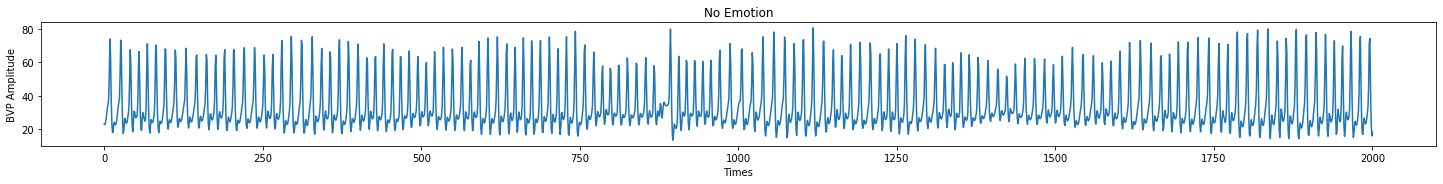

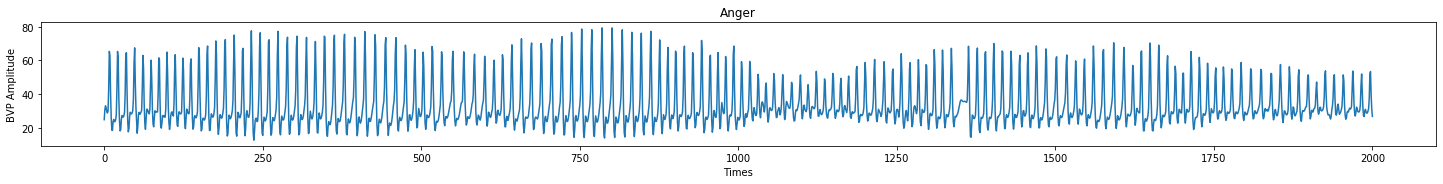

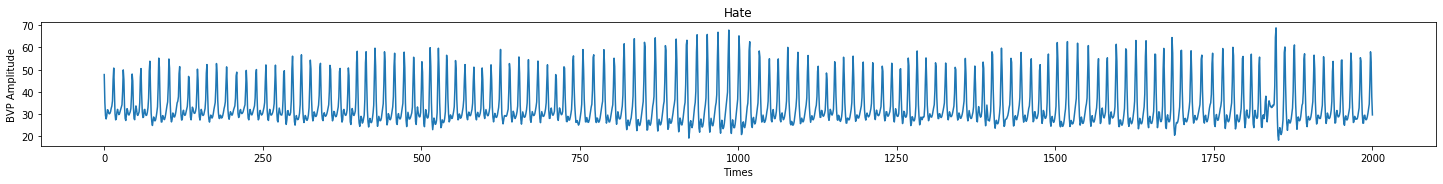

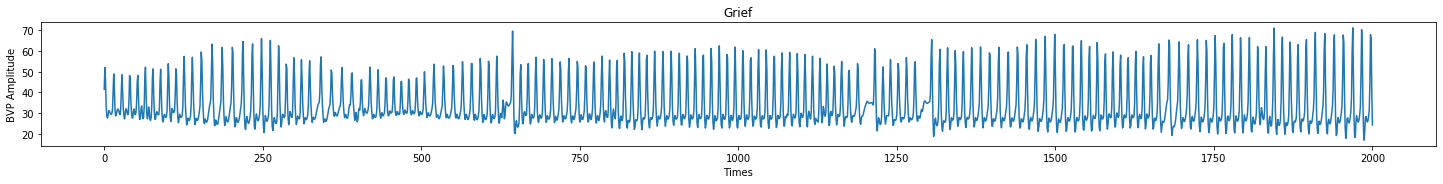

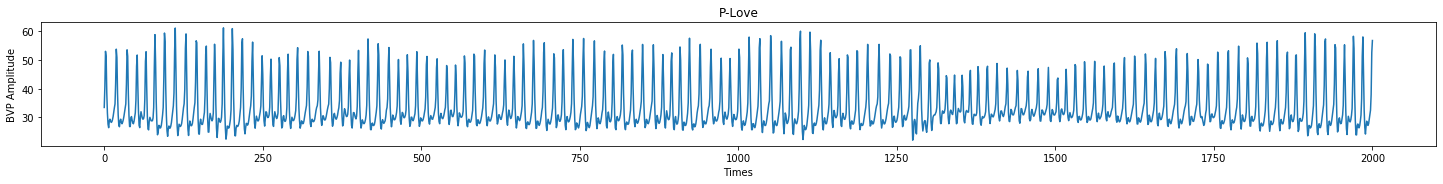

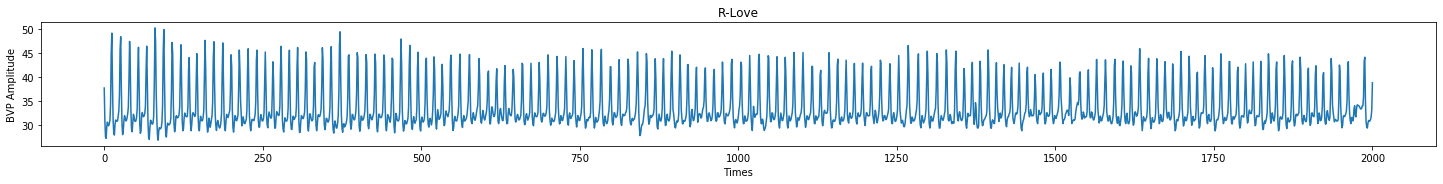

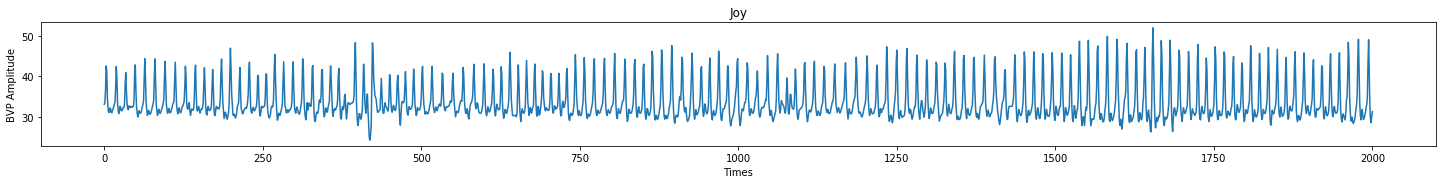

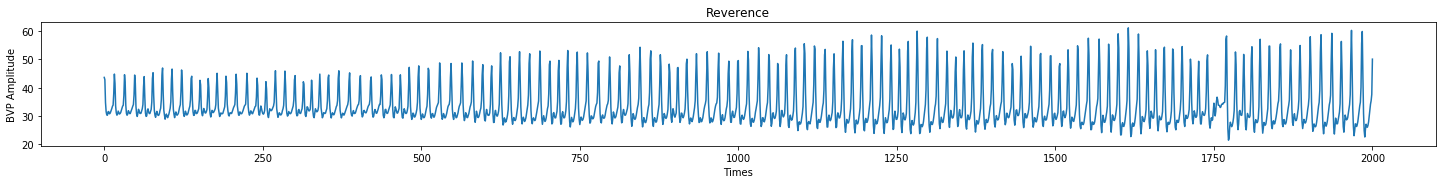

In [11]:
display(BVP, ylabel = 'BVP Amplitude')

In [12]:
# display(RES, ylabel = 'RES Amplitude')

In [13]:
# display(GSR, ylabel = "GSR amplitude")

In [14]:
# display(EMG, ylabel = "EMG amplitude")

In [15]:
Sig_No_Emotion = []
Sig_Anger = []
Sig_Hate = []
Sig_Grief = []
Sig_P_Love = []
Sig_R_Love = []
Sig_Joy = []
Sig_Reverence = []

EmotionKeysDict = {}

for key in list(alldays_data['day2'].keys()):
    print(key)
    Sig_No_Emotion.append(alldays_data['day2'][key][Emotion_Keys[0]])
    Sig_Anger.append(alldays_data['day2'][key][Emotion_Keys[1]])
    Sig_Hate.append(alldays_data['day2'][key][Emotion_Keys[2]])
    Sig_Grief.append(alldays_data['day2'][key][Emotion_Keys[3]])
    Sig_P_Love.append(alldays_data['day2'][key][Emotion_Keys[4]])
    Sig_R_Love.append(alldays_data['day2'][key][Emotion_Keys[5]])
    Sig_Joy.append(alldays_data['day2'][key][Emotion_Keys[6]])
    Sig_Reverence.append(alldays_data['day2'][key][Emotion_Keys[7]])
    


EMG(jaw)
BVP
GSR(palm)
Respiration


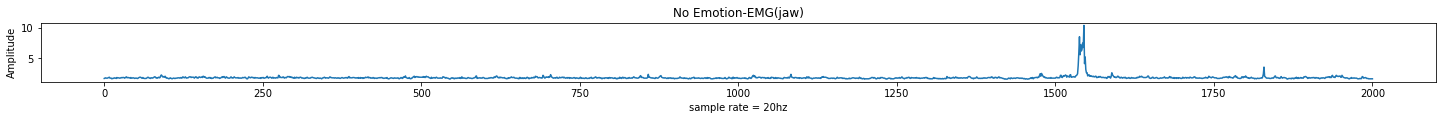

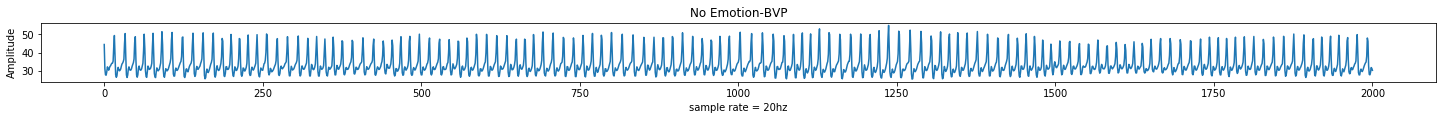

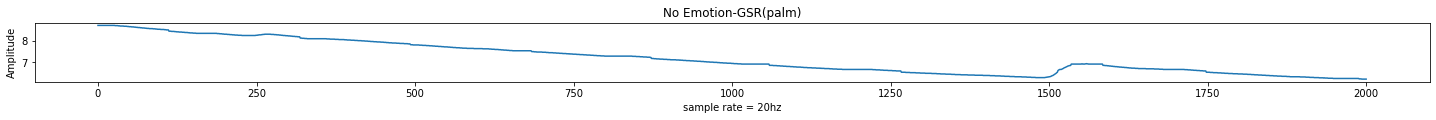

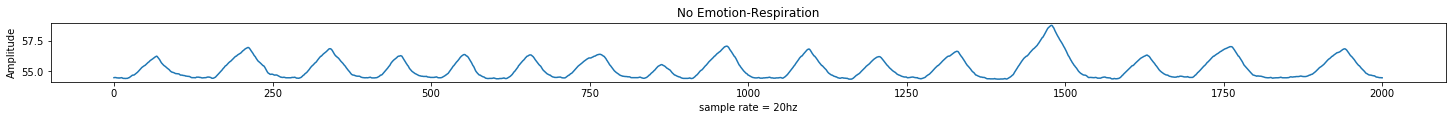

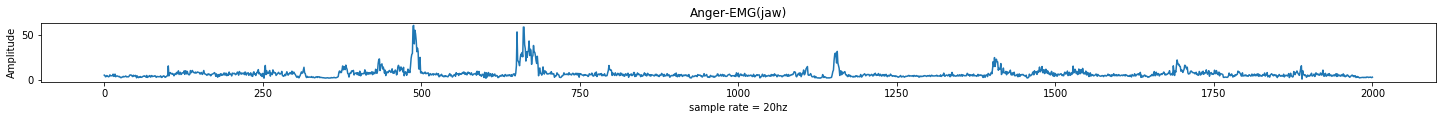

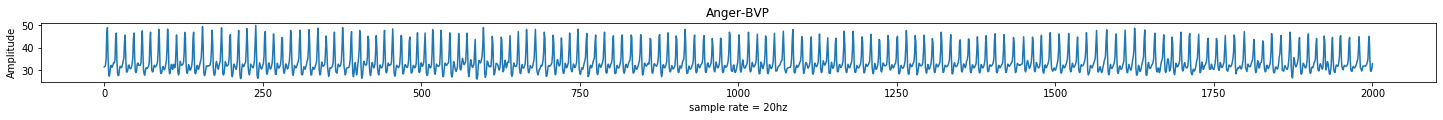

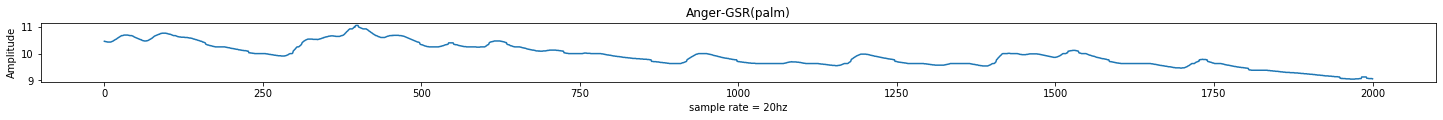

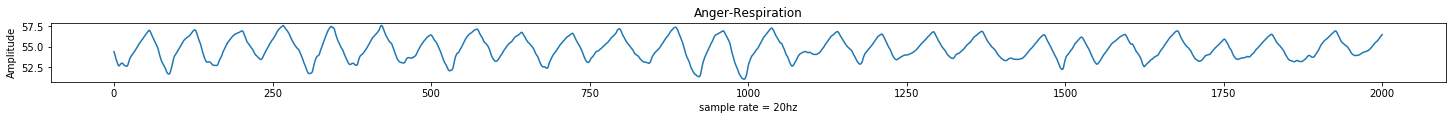

In [16]:

for i, sig in enumerate(Sig_No_Emotion):
    plt.figure(figsize = (25,5))
    plt.subplot(4,1,i+1)
    plt.plot(sig)
    plt.title(Emotion_Keys[0] +"-" + Keys[i])
    plt.xlabel("sample rate = 20hz")
    plt.ylabel("Amplitude")
plt.show()
for i, sig in enumerate(Sig_Anger):
    plt.figure(figsize = (25,5))
    plt.subplot(4,1,i+1)
    plt.plot(sig)
    plt.title(Emotion_Keys[1] +"-" + Keys[i])
    plt.xlabel("sample rate = 20hz")
    plt.ylabel("Amplitude")
plt.show()


In [17]:
listdays = list(alldays_data.keys())

print(listdays)

Sig_No_Emotion = []
Sig_Anger = []
Sig_Hate = []
Sig_Grief = []
Sig_P_Love = []
Sig_R_Love = []
Sig_Joy = []
Sig_Reverence = []

EmotionKeysDict = {}
for day in listdays:
    for key in list(alldays_data[day].keys()):
        Sig_No_Emotion.append(alldays_data[day][key][Emotion_Keys[0]])
        Sig_Anger.append(alldays_data[day][key][Emotion_Keys[1]])
        Sig_Hate.append(alldays_data[day][key][Emotion_Keys[2]])
        Sig_Grief.append(alldays_data[day][key][Emotion_Keys[3]])
        Sig_P_Love.append(alldays_data[day][key][Emotion_Keys[4]])
        Sig_R_Love.append(alldays_data[day][key][Emotion_Keys[5]])
        Sig_Joy.append(alldays_data[day][key][Emotion_Keys[6]])
        Sig_Reverence.append(alldays_data[day][key][Emotion_Keys[7]])


['day1', 'day2', 'day3', 'day4', 'day5', 'day6', 'day7', 'day8', 'day9', 'day10', 'day11', 'day12', 'day13', 'day14', 'day15', 'day16', 'day17', 'day18', 'day19', 'day20']


In [18]:
# No_Emotion = np.array(Sig_No_Emotion)
# print(No_Emotion.shape)

# # ghép toàn bộ dữ liệu lại 
# Data = np.concatenate((Sig_No_Emotion, Sig_Anger, 
#                        Sig_Hate, Sig_Grief, 
#                        Sig_P_Love, Sig_R_Love, 
#                        Sig_Joy, Sig_Reverence),axis = 0)
# print(Data.shape)        
# # reshape lại dữ liệu 
# reshaped_data = Data.reshape(160, 4, 2001)
# data_form = np.transpose(reshaped_data, (0,2,1))
# print(data_form.shape)
# np.save("data.npy", data_form)

# # tạo file labels cho dữ liệu
# Labels = []
# for i in range(160):
#     x = (i+1)/20
#     if x <=1:
#         Labels.append(Emotion_Keys[0])
#     elif x>1 and x<=2:
#         Labels.append(Emotion_Keys[1])
#     elif x>2 and x<=3:
#         Labels.append(Emotion_Keys[2])
#     elif x>3 and x<=4:
#         Labels.append(Emotion_Keys[3])
#     elif x>4 and x<=5:
#         Labels.append(Emotion_Keys[4])
#     elif x>5 and x<=6:
#         Labels.append(Emotion_Keys[5])
#     elif x>6 and x<=7:
#         Labels.append(Emotion_Keys[6])
#     else:
#         Labels.append(Emotion_Keys[7])
# print(Labels)

# np.save("labels.npy", Labels)

(80, 2001)
(640, 2001)
(160, 2001, 4)
['No Emotion', 'No Emotion', 'No Emotion', 'No Emotion', 'No Emotion', 'No Emotion', 'No Emotion', 'No Emotion', 'No Emotion', 'No Emotion', 'No Emotion', 'No Emotion', 'No Emotion', 'No Emotion', 'No Emotion', 'No Emotion', 'No Emotion', 'No Emotion', 'No Emotion', 'No Emotion', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Anger', 'Hate', 'Hate', 'Hate', 'Hate', 'Hate', 'Hate', 'Hate', 'Hate', 'Hate', 'Hate', 'Hate', 'Hate', 'Hate', 'Hate', 'Hate', 'Hate', 'Hate', 'Hate', 'Hate', 'Hate', 'Grief', 'Grief', 'Grief', 'Grief', 'Grief', 'Grief', 'Grief', 'Grief', 'Grief', 'Grief', 'Grief', 'Grief', 'Grief', 'Grief', 'Grief', 'Grief', 'Grief', 'Grief', 'Grief', 'Grief', 'P-Love', 'P-Love', 'P-Love', 'P-Love', 'P-Love', 'P-Love', 'P-Love', 'P-Love', 'P-Love', 'P-Love', 'P-Love', 'P-Love', 'P-Love', 'P-Love', 'P-Love', 'P-Love', '

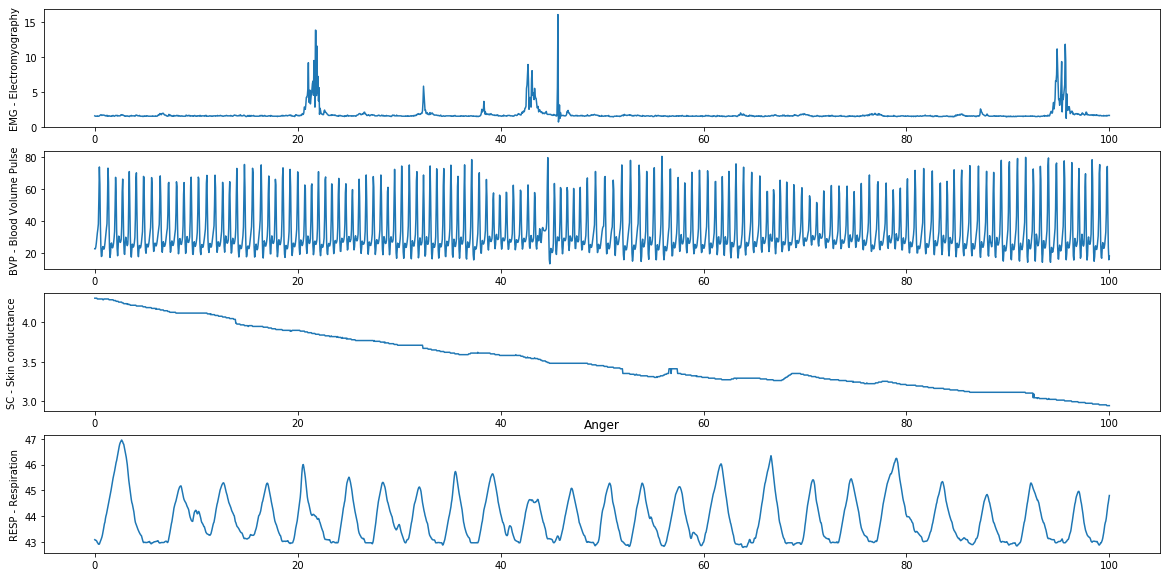

In [8]:
data = np.load("data.npy")
labels = np.load("labels.npy")
yaxis = ['EMG - Electromyography', 'BVP - Blood Volume Pulse', 'SC - Skin conductance', 'RESP - Respiration']
fig, ax = plt.subplots(4, 1, figsize  = (20, 10))
x = np.linspace(0, 100, 2001)
for i in range(4):
    ax[i].plot(x, data[0,:,i])
    ax[i].set_ylabel(yaxis[i])
plt.title(labels[21])
plt.savefig("4sig.jpeg")
plt.show()

In [3]:
def segmenting_overlapping(data, slice_length = 10, overlap = 3,sampling_rate = 20):
    # data: all data
    # slice_length: length of the slice in seconds
    # overlap: length of the overlapping in seconds
    # sampling_rate: sampling rate of the signal
    segmented_data = []
    data_shape = data.shape
    len_signal = data_shape[2]

    for sset in data:
        segmented_set = []
        for signal in sset:
            segments_list = []
            
            slices = np.arange(0, int(len_signal/sampling_rate), slice_length-overlap, dtype=np.int) # 26 is arbitrary
            for start, end in zip(slices[:-1], slices[1:]):
                start_segment = start * sampling_rate
                end_segment = min((end +overlap)* sampling_rate, len_signal) 
#                 print(start_audio, end_audio)
                if end_segment-start_segment == 200:
                    segments_list.append(signal[start_segment:end_segment])
            segmented_set.append(segments_list)
            segments_list = []
        segmented_data.append(segmented_set)
        segmented_set = []
    segmented_data = np.array(segmented_data)
    return segmented_data



In [6]:
slice_length = 10 
overlap = 8
sampling_rate = 20
# data_cut = segmenting(np.transpose(data, (0, 2, 1)))    
data_cut = segmenting_overlapping(np.transpose(data, (0, 2, 1)), slice_length = slice_length, overlap = overlap, sampling_rate = sampling_rate)    

In [13]:
datax = np.transpose(data_cut, (0, 2, 1, 3))
print(datax.shape)
y = np.zeros((20, datax.shape[1]))
labelx = y
for i in range(1,8):
    labelx = np.concatenate((labelx, y+i))
print(labelx.shape)

dataxx = np.reshape(datax, (-1, 4, 200))
labelxx = np.reshape(labelx, (-1))
print(dataxx.shape)
print(labelxx.shape)

(160, 46, 4, 200)
(160, 46)
(7360, 4, 200)
(7360,)


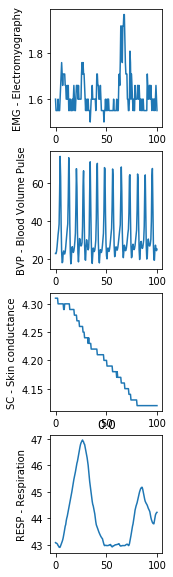

In [17]:
yaxis = ['EMG - Electromyography', 'BVP - Blood Volume Pulse', 'SC - Skin conductance', 'RESP - Respiration']
fig, ax = plt.subplots(4, 1, figsize  = (2, 10))
x = np.linspace(0, 100, 200)
for i in range(4):
    ax[i].plot(x, dataxx[0,i,:])
    ax[i].set_ylabel(yaxis[i])
plt.title(labelxx[0])
plt.savefig("4sig.jpeg")
plt.show()

[0.000e+00 5.000e-02 1.000e-01 ... 9.990e+01 9.995e+01 1.000e+02]


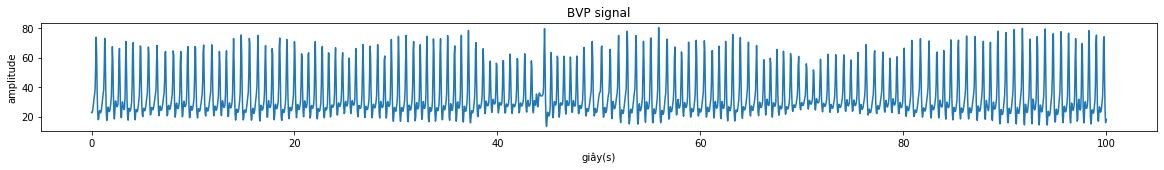

In [42]:

x = np.linspace(0, 100, 2001)
print(x)
plt.figure(figsize = (20,2))
plt.plot(x, data[0,:,1])
plt.title("BVP signal")
plt.ylabel("amplitude")
plt.xlabel("giây(s)")
plt.savefig("BVPs.png")

[ 0.          0.05025126  0.10050251  0.15075377  0.20100503  0.25125628
  0.30150754  0.35175879  0.40201005  0.45226131  0.50251256  0.55276382
  0.60301508  0.65326633  0.70351759  0.75376884  0.8040201   0.85427136
  0.90452261  0.95477387  1.00502513  1.05527638  1.10552764  1.15577889
  1.20603015  1.25628141  1.30653266  1.35678392  1.40703518  1.45728643
  1.50753769  1.55778894  1.6080402   1.65829146  1.70854271  1.75879397
  1.80904523  1.85929648  1.90954774  1.95979899  2.01005025  2.06030151
  2.11055276  2.16080402  2.21105528  2.26130653  2.31155779  2.36180905
  2.4120603   2.46231156  2.51256281  2.56281407  2.61306533  2.66331658
  2.71356784  2.7638191   2.81407035  2.86432161  2.91457286  2.96482412
  3.01507538  3.06532663  3.11557789  3.16582915  3.2160804   3.26633166
  3.31658291  3.36683417  3.41708543  3.46733668  3.51758794  3.5678392
  3.61809045  3.66834171  3.71859296  3.76884422  3.81909548  3.86934673
  3.91959799  3.96984925  4.0201005   4.07035176  4.

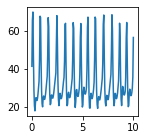

In [48]:

x = np.linspace(0, 10, 200)
print(x)
plt.figure(figsize = (2,2))
plt.plot(x, dataxx[2,1,:])
plt.savefig("BVPs3.png")